In [1]:
# 와인 품질 예측 모델 만들기 1
    - 머신러닝을 위한 와인 품질 데이터를 탐색하고 분석하는 방법을 살펴본다.
    - 단순 선형 회귀의 특징을 살펴본다.
    - 다중 선형 회귀의 특징을 살펴본다.
    - 다항 회귀의 특징을 살펴본다.
    

IndentationError: unexpected indent (<ipython-input-1-d6927d37dcaf>, line 2)

In [2]:
- 머신러닝을 위한 와인 품질 데이터를 탐색하고 분석하는 방법을 살펴본다.
  = 관측값 : 총 6,497건 (레드와인:1,599건, 화이트 와인:4,898건)
  = 입력변수 : 12개(고정산, 휘발산, 구연산, 잔여당, 염화물, 무수아황산, 총이산화황, 밀도, 산성도, 황산염, 알콜도수와 같은 와인의
              물리화학적 특성들과 red, white의 화인 타입)
  = 출력변수 1개 (와인품질평가점수, 가장 낮은 품질 1점 ~ 가장 높은 품질 10정)

SyntaxError: invalid syntax (<ipython-input-2-cfb1320205a7>, line 1)

In [5]:
import pandas as pd

redwine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", 
                      sep=";", header=0)
redwine["type"] = "red"
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
whitewine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", 
                      sep=";", header=0)
whitewine["type"] = "white"
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [8]:
wine = redwine.append(whitewine)
wine.shape

(6497, 13)

In [11]:
wine.columns = wine.columns.str.replace(" ","_")
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [12]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [13]:
wine.quality.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [14]:
# 와인 종류별 품질의 기술 통계량.
wine.groupby("type")["quality"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [19]:
# 와인 종류별 품질의 사분위수
# quantile쓸때, 리스트를 구분해 Q1 Q5, 5개에 대한 변수 정보가 담김.
wine.groupby("type")["quality"].quantile([0, 0.25, 0.5, 0.75, 1]).unstack("type")

type,red,white
0.00,3.0,3.0
0.25,5.0,5.0
0.50,6.0,6.0
0.75,6.0,6.0
1.00,8.0,9.0


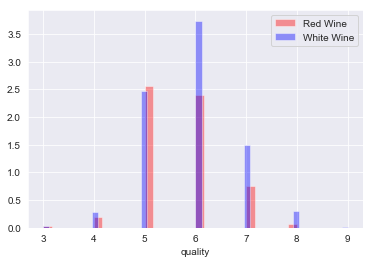

In [28]:
# 와인 종류별 품질의 분포

red_q   = wine.loc[wine["type"]=="red", "quality"]
white_q = wine.loc[wine["type"]=="white", "quality"]

import seaborn as sns
sns.set_style("darkgrid")
# 분포 플롯 그리기
sns.distplot(red_q, norm_hist=True, kde=False, color="red", label="Red Wine")
sns.distplot(white_q, norm_hist=True, kde=False, color="blue", label="White Wine")

import matplotlib.pyplot as plt
plt.legend();


In [29]:
# 와인 종류별 품질 차이의 통계적 유의성 검정

wine.groupby("type")["quality"].aggregate(["std","mean"])

,std,mean
type,,
red,0.807569,5.636023
white,0.885639,5.877909


In [30]:
# 비교값이 2개면 t-검정, 3개이상이면 Anova
import statsmodels.api as sm

# sm.stats.ttest_ind(red_q, white_q) t-검정하다.
# 반환값 t_stat(통계량), p_value, df(degree of freedom ) 밀도함수를 그릴때 함수의 기울기
t_stat, p_value, df = sm.stats.ttest_ind(red_q, white_q)
"t-stat : {:.3f}, p-value: {: .4f}".format(t_stat, p_value)

# p-vlaue = 0.000 < 0.05 평균의 차이가 있다.

't-stat : -9.686, p-value:  0.0000'